# ARIMA

In [ ]:
! pip install pmdarima

     |████████████████████████████████| 1.5 MB 4.2 MB/s 
     |████████████████████████████████| 9.5 MB 24.5 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
import pandas as pd
import numpy as np
from pmdarima.arima import auto_arima
import matplotlib.pyplot as plt

## Cargar Datos

In [ ]:
#df = pd.read_excel("/content/series_risk.xlsx", sheet_name = "original")
df = pd.read_excel("/content/series_risk.xlsx", sheet_name = "frecuencia")
df.head()

,Colombia,México,El Salvador,Chile,Argentina
0,-0.046177,-0.012809,NaN,-0.040123,-0.245524
1,0.107437,0.079121,0.983401,0.028564,-0.273856
2,-0.157847,0.095252,0.983401,0.026095,0.221917
3,-0.198653,-0.012417,0.983401,-0.003267,0.140645
4,-0.038226,-0.060750,1.344883,-0.098713,0.122676


In [ ]:
#df.set_index("Fecha", inplace = True)

In [ ]:
paises = list(df.columns)
paises

['Colombia', 'México', 'El Salvador', 'Chile', 'Argentina']

## Test de Dickey Fueller

In [ ]:
from pmdarima.arima import auto_arima
from pmdarima.arima import ADFTest
pais = "El Salvador"
df = df.dropna().reset_index(drop = True)
adf_test = ADFTest(alpha = 0.05)
adf_test.should_diff(df[pais].dropna())

,Colombia,México,El Salvador,Chile,Argentina
0,0.107437,0.079121,0.983401,0.028564,-0.273856
1,-0.157847,0.095252,0.983401,0.026095,0.221917
2,-0.198653,-0.012417,0.983401,-0.003267,0.140645
3,-0.038226,-0.060750,1.344883,-0.098713,0.122676
4,-0.083811,-0.077990,1.344883,-0.007186,0.330163
...,...,...,...,...,...
198,0.314178,0.111933,1.164353,0.117628,0.100486
199,0.248974,0.104857,1.183270,0.014681,0.027526
200,-0.100577,0.007903,1.091080,0.007026,-0.026825
201,-0.157769,-0.137645,1.096910,0.069674,-0.001543


La hipotesis nula "la serie es estacionaria" se rechaza pues p-value < alpha. O sea que deberíamos integrar el proceso (sacarle diferencias) 

In [ ]:
len(df)

203

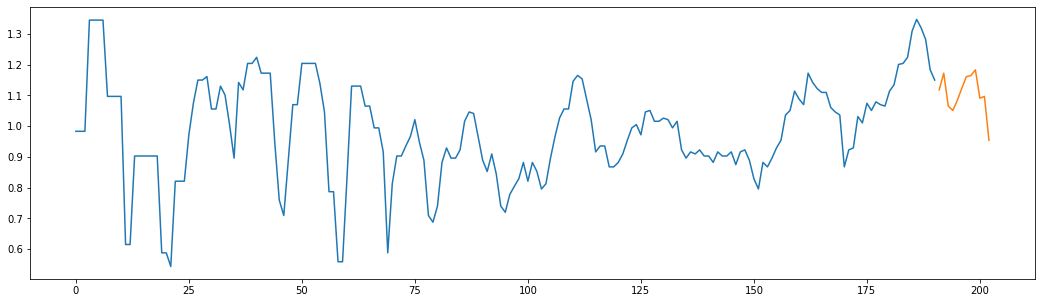

In [ ]:
n = len(df) - 12
train=df[:n]
test=df[n:]
plt.plot(train[pais])
plt.plot(test[pais])

## Autoarima

In [ ]:
arima_model = model=auto_arima(train[pais].dropna(),start_p=0,d=1,start_q=0,
          max_p=5,max_d=5,max_q=5, start_P=0,
          D=1, start_Q=0, max_P=5,max_D=5,
          max_Q=5, m=12, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=20,n_fits=50)
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-233.775, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-285.487, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-301.381, Time=0.71 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-231.972, Time=0.12 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-299.398, Time=1.97 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=-299.393, Time=2.12 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-285.489, Time=0.27 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=-300.495, Time=3.55 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-303.086, Time=0.52 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=-301.128, Time=0.44 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=-301.117, Time=1.46 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-287.485, Time=0.14 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=-302.302, Time=2.48 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=-301.274, Time=0.66 sec
 ARIMA(1,1,1)(0,1,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  191
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 12)   Log Likelihood                 161.685
Date:                              Fri, 24 Sep 2021   AIC                           -313.370
Time:                                      14:48:44   BIC                           -297.461
Sample:                                           0   HQIC                          -306.918
                                              - 191                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7138      0.086      8.323      0.000       0.546       0.882
ma.L1         -0.7605      0.111     -6.878      0.000      -0.977      -0.544
ma.L2         -0.1955      0.073     -2.695      0.007      -0.338      -0.053
ma.S.L12      -0.8205      0.090     -9.073      0.000      -0.998      -0.643
sigma2         0.0086      0.001     10.016      0.000       0.007       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.01   Jarque-Bera (JB):                28.53
Prob(Q):                              0.92   Prob(JB):                         0.00
Heteroskedasticity (H):               0.18   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         4.93
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

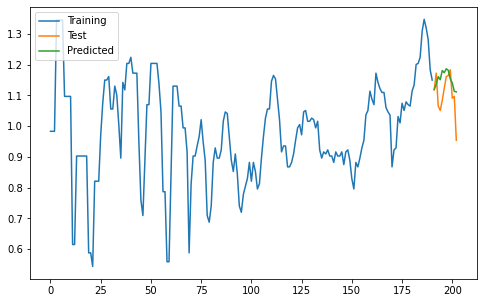

In [ ]:
# Forecasting
n_forecast = 12
prediction = pd.DataFrame(model.predict(n_periods = n_forecast),index=test.index)
prediction.columns = ['predicted']
plt.figure(figsize=(8,5))
plt.plot(train[pais],label="Training")
plt.plot(test[pais],label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'upper left')
#plt.savefig('SecondPrection.jpg')
plt.show()

# ARMA Modelling

## ACF and PACF

El Salvador


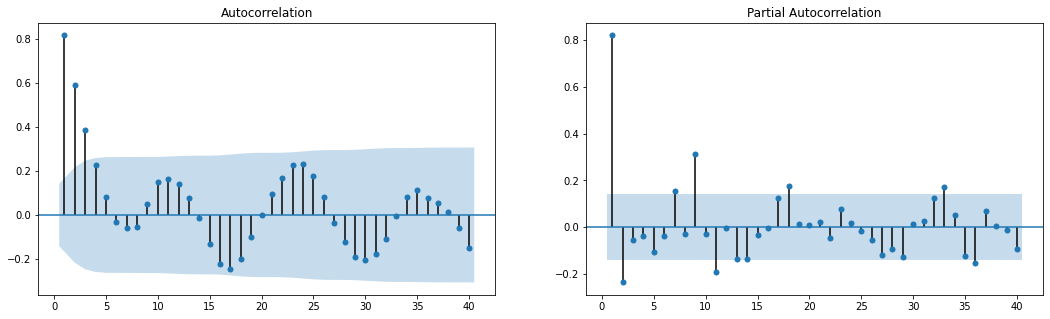

In [ ]:
import statsmodels.graphics.tsaplots as sgt

# Fixing plot size
plt.rcParams["figure.figsize"] = 18, 5

# Defining Subplots
fig, axes = plt.subplots(1, 2)

# Plotting ACF and PACF for S&P 500 Returns
sgt.plot_acf(train[pais], zero = False, lags = 40, ax = axes[0])
sgt.plot_pacf(train[pais], zero = False, lags = 40, ax = axes[1])

# Display the Plot
print(pais)
plt.show()

This looks like a p (from PACF) = 3 and q (from ACF) = 3
Autoarima predicted SARIMAX(4, 1, 0)x(5, 1, 0, 12) the later part is for seasonal and the first for regular arima

In [ ]:
# Check for stationarity
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(df[pais])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.509971
p-value: 0.007735


Series looks stationary: Null hypothesis is that there is a unit root in the process. If null hyphotesis is not rejectedm then the process would not be stationary. In this case we reject null hypothesis, so process "is" stationary.

When p-value < alpha, null hypothesis is rejected

## Model Fitting

Voy a poner un ARIMA 1,0,1, el más básico para poner un punto de partida

In [ ]:
# MODEL FITTING
# Importing Required Package
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Defining the Model
model = SARIMAX(train[pais], order = (1, 0, 3))
# Fitting the Model
model_results = model.fit()

# Printing the model summary
print(pais)
print(model_results.summary())

El Salvador
                               SARIMAX Results                                
Dep. Variable:            El Salvador   No. Observations:                  191
Model:               SARIMAX(1, 0, 3)   Log Likelihood                 177.203
Date:                Fri, 24 Sep 2021   AIC                           -344.407
Time:                        14:49:48   BIC                           -328.145
Sample:                             0   HQIC                          -337.820
                                - 191                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9995      0.002    522.719      0.000       0.996       1.003
ma.L1          0.0392      0.062      0.633      0.527      -0.082       0.160
ma.L2         -0.2213      0.059     -3.

Segun la tabla los coeficientes del ar(1), el ma(1) son "significativos"

## Forecast Results

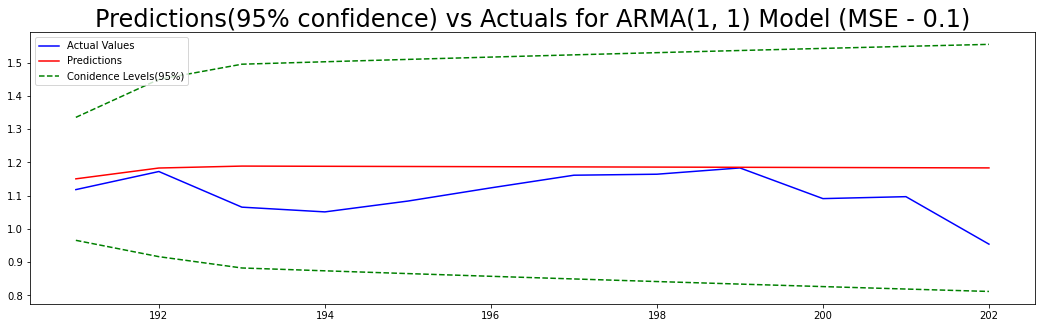

In [ ]:
# FORECASTING
# Building Forecast Object to generate Confidence Intervals
from sklearn.metrics import mean_squared_error
arma_forecast = model_results.get_forecast(len(test.index))
arma_predictions_df = arma_forecast.conf_int(alpha = 0.05) # Confidence level of 95%
# Predictions
arma_predictions_df["Predictions"] = model_results.predict(start = test.index[0], end = test.index[-1])

# RMSE for the Predictions
arma_rmse = np.sqrt(mean_squared_error(test[pais].values, arma_predictions_df["Predictions"]))


# PLOTTING FORECASTS
# Set the Size of the figure
plt.rcParams["figure.figsize"] = 18, 5

# Plot the Actuals
plt.plot(test[pais], color = "blue", label = "Actual Values")

# Plot the Forecasts and the Confidence Intervals 
plt.plot(arma_predictions_df["Predictions"][test.index], color = "red", label = "Predictions")
plt.plot(arma_predictions_df["upper "+ pais][test.index], color = "green", linestyle = "--", label = "Conidence Levels(95%)")
plt.plot(arma_predictions_df["lower "+ pais][test.index], color = "green", linestyle = "--")

# Set the Title of the Plot
plt.title(f"Predictions(95% confidence) vs Actuals for ARMA(1, 1) Model (MSE - {round(arma_rmse, 2)})", size = 24)

# Display the plot with appropriate labels
plt.legend()
plt.show()

## Model Residuals

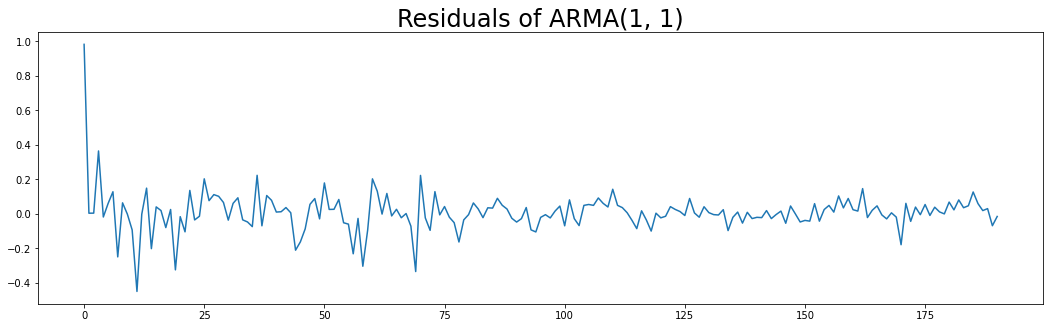

In [ ]:
# Set the figure size
plt.rcParams["figure.figsize"] = 18, 5

# Plotting residuals
plt.plot(model_results.resid, label = "Residuals")

# Setting Title
plt.title("Residuals of ARMA(1, 1)", size = 24)

# Display the plot
plt.show()

Se observa que los residuales no son constantes o aleatorios a través del modelo. Por ejemplo en 2013 (Argentina) hay un salto en los residuales. Esto se puede modelar con un modelo de varianza condicional (GARCH)

# ARCH y GARCH

garch modeling 

## Order Estimation

The GARCH model, has 2 parameters represented as: GARCH(p, q). These parameters are estimated by counting the number of significant lags in the PACF plot. The code to generate such a plot is not shown as it is very similar to the PACF plot code above. Only tweaks needed are in the data passed. In this case the series passed will be model_results.resid 

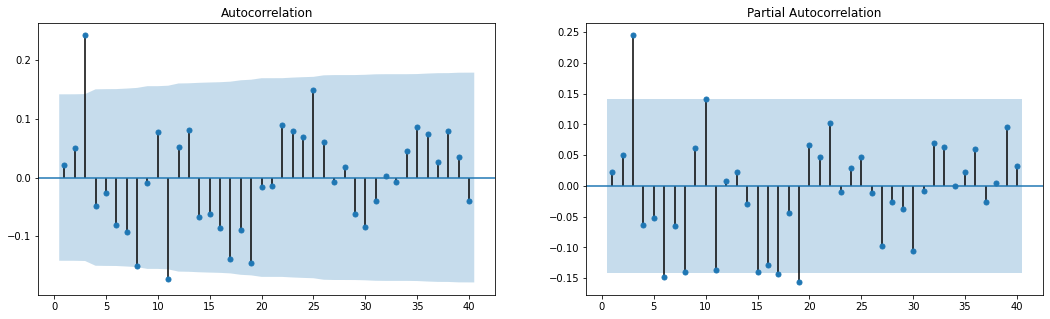

In [ ]:
residuales = model_results.resid

plt.rcParams["figure.figsize"] = 18, 5

# Defining Subplots
fig, axes = plt.subplots(1, 2)

# Plotting ACF and PACF for S&P 500 Returns
sgt.plot_acf(residuales, zero = False, lags = 40, ax = axes[0])
sgt.plot_pacf(residuales, zero = False, lags = 40, ax = axes[1])

# Display the Plot
plt.show()

Aparentemente es un GARCH(3,3) pues el tercer residual parece mostrar significancia estadística. Aún así se evaluan diferentes combinaciones de GARCH.

In [ ]:
!pip install arch

## Fit Model

In [ ]:
from arch import arch_model

# Building Residuals DataFrame
resid_df = df.copy()
resid_df[pais + "_resid"] = resid_df[pais].shift(1).loc[resid_df.index]
resid_df.at[train.index[1]:train.index[-1], pais + "_resid"] = model_results.resid

# Defining GARCH(p, q) model
resid_model = arch_model(resid_df[pais + "_resid"][1:], p = 1, q = 1, vol = "GARCH")
# Fitting (Training) the model
resid_model_results = resid_model.fit(last_obs = test.index[0], update_freq = 5)
# Displaying the model summary
resid_model_results.summary()

Iteration:      5,   Func. Count:     38,   Neg. LLF: -126.83881076240797
Iteration:     10,   Func. Count:     83,   Neg. LLF: -126.8745218805326
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -126.90399215462743
            Iterations: 14
            Function evaluations: 101
            Gradient evaluations: 13


/usr/local/lib/python3.7/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.0158. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


<class 'statsmodels.iolib.summary.Summary'>
"""
                     Constant Mean - GARCH Model Results                      
==============================================================================
Dep. Variable:      El Salvador_resid   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                      GARCH   Log-Likelihood:                126.904
Distribution:                  Normal   AIC:                          -245.808
Method:            Maximum Likelihood   BIC:                          -232.799
                                        No. Observations:                  191
Date:                Fri, Sep 24 2021   Df Residuals:                      190
Time:                        14:52:37   Df Model:                            1
                                  Mean Model                                 
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
mu             0.0101  8.223e-03      1.225      0.220 [-6.040e-03,2.619e-02]
                               Volatility Model                              
=============================================================================
                 coef    std err          t      P>|t|       95.0% Conf. Int.
-----------------------------------------------------------------------------
omega      8.4905e-04  1.029e-03      0.825      0.409 [-1.167e-03,2.865e-03]
alpha[1]       0.0000  3.303e-03      0.000      1.000 [-6.473e-03,6.473e-03]
beta[1]        0.9409  3.997e-02     23.542 1.530e-122      [  0.863,  1.019]
=============================================================================

Covariance estimator: robust
"""

## Predictions

In this section we use the GARCH(p, q) model fitted on residuals of ARMA(1, 1) to predict the volatility of the residuals in the test set.

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


[]

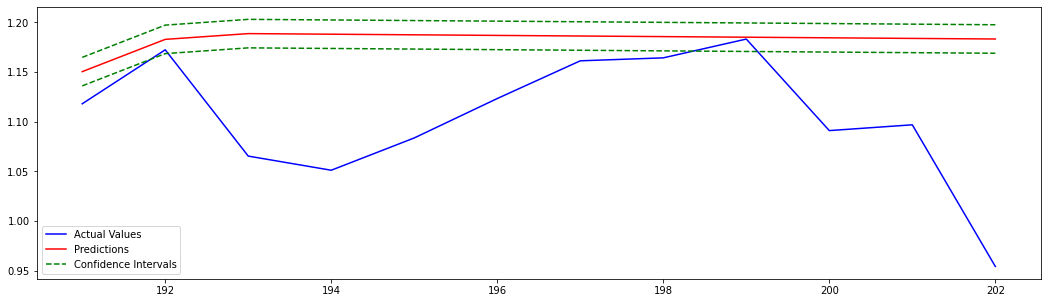

In [ ]:
# FORECASTING AND CONFIDENCE INTERVALS
# Forecasting volatility of test set
resid_forecasts = resid_model_results.forecast().residual_variance.loc[test.index].values

# New Confidence Intervals
arma_garch_predictions_df = arma_predictions_df.copy()
arma_garch_predictions_df["lower " + pais] = arma_garch_predictions_df["Predictions"] - resid_forecasts.reshape(-1,)
arma_garch_predictions_df["upper " + pais] = arma_garch_predictions_df["Predictions"] + resid_forecasts.reshape(-1,)


# PLOTTING THE FORECASTS AND CONFIDENCE INTERVALS
# Setting the Figure size
plt.rcParams["figure.figsize"] = 18, 5

# Plotting the Actual S&P 500 Returns
plt.plot(test[pais], color = "blue", label = "Actual Values")

# Plot the Forecasted Returns from ARMA(1, 1) 
plt.plot(arma_garch_predictions_df["Predictions"][test.index], color = "red", label = "Predictions")
# Plot the new confidence intervals generated by the GARCH model
plt.plot(arma_garch_predictions_df["lower " + pais][test.index], color = "green", linestyle = "--", label = "Confidence Intervals")
plt.plot(arma_garch_predictions_df["upper " + pais][test.index], color = "green", linestyle = "--")

# Display the plot and the labels
plt.legend()
plt.plot()

# Out of sample Forecast

## ARIMA

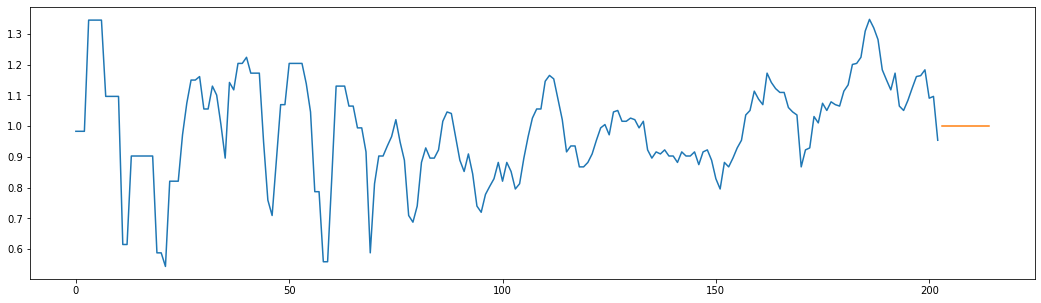

In [ ]:
data = df.copy()

ones_df = pd.DataFrame(np.ones(shape=(12,5))) #crear matriz de unos
ones_df.columns = data.columns #ponerle el nombre de las columnas
data = pd.concat([data, ones_df]).reset_index(drop = True) # juntas matrices

n = len(data) - 12
train=data[:n]
test=data[n:]


plt.plot(train[pais])
plt.plot(test[pais])

In [ ]:
arima_model = model=auto_arima(train[pais].dropna(),start_p=0,d=1,start_q=0,
          max_p=5,max_d=5,max_q=5, start_P=0,
          D=1, start_Q=0, max_P=5,max_D=5,
          max_Q=5, m=12, seasonal=True,
          error_action='warn',trace=True,
          supress_warnings=True,stepwise=True,
          random_state=20,n_fits=50)
arima_model.summary()

Performing stepwise search to minimize aic
 ARIMA(0,1,0)(0,1,0)[12]             : AIC=-258.255, Time=0.03 sec
 ARIMA(1,1,0)(1,1,0)[12]             : AIC=-313.979, Time=0.29 sec
 ARIMA(0,1,1)(0,1,1)[12]             : AIC=-329.454, Time=1.82 sec
 ARIMA(0,1,1)(0,1,0)[12]             : AIC=-256.384, Time=0.12 sec
 ARIMA(0,1,1)(1,1,1)[12]             : AIC=-327.508, Time=1.05 sec
 ARIMA(0,1,1)(0,1,2)[12]             : AIC=-327.493, Time=2.19 sec
 ARIMA(0,1,1)(1,1,0)[12]             : AIC=-313.981, Time=0.32 sec
 ARIMA(0,1,1)(1,1,2)[12]             : AIC=-329.201, Time=4.37 sec
 ARIMA(0,1,0)(0,1,1)[12]             : AIC=-331.298, Time=1.14 sec
 ARIMA(0,1,0)(1,1,1)[12]             : AIC=-329.379, Time=0.61 sec
 ARIMA(0,1,0)(0,1,2)[12]             : AIC=-329.357, Time=1.85 sec
 ARIMA(0,1,0)(1,1,0)[12]             : AIC=-315.974, Time=0.16 sec
 ARIMA(0,1,0)(1,1,2)[12]             : AIC=-331.091, Time=2.71 sec
 ARIMA(1,1,0)(0,1,1)[12]             : AIC=-329.400, Time=0.74 sec
 ARIMA(1,1,1)(0,1,1

<class 'statsmodels.iolib.summary.Summary'>
"""
                                      SARIMAX Results                                       
============================================================================================
Dep. Variable:                                    y   No. Observations:                  203
Model:             SARIMAX(1, 1, 2)x(0, 1, [1], 12)   Log Likelihood                 176.252
Date:                              Fri, 24 Sep 2021   AIC                           -342.503
Time:                                      15:01:53   BIC                           -326.268
Sample:                                           0   HQIC                          -335.927
                                              - 203                                         
Covariance Type:                                opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.7274      0.073      9.991      0.000       0.585       0.870
ma.L1         -0.7864      0.092     -8.524      0.000      -0.967      -0.606
ma.L2         -0.1814      0.071     -2.561      0.010      -0.320      -0.043
ma.S.L12      -0.8135      0.085     -9.563      0.000      -0.980      -0.647
sigma2         0.0084      0.001     10.403      0.000       0.007       0.010
===================================================================================
Ljung-Box (L1) (Q):                   0.02   Jarque-Bera (JB):                32.78
Prob(Q):                              0.90   Prob(JB):                         0.00
Heteroskedasticity (H):               0.20   Skew:                             0.18
Prob(H) (two-sided):                  0.00   Kurtosis:                         5.00
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

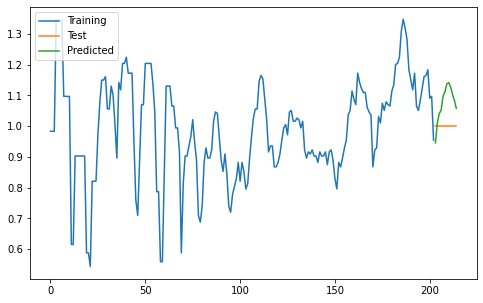

In [ ]:
# Forecasting
n_forecast = 12
prediction = pd.DataFrame(model.predict(n_periods = n_forecast),index=test.index)
prediction.columns = ['predicted']
plt.figure(figsize=(8,5))
plt.plot(train[pais],label="Training")
plt.plot(test[pais],label="Test")
plt.plot(prediction,label="Predicted")
plt.legend(loc = 'upper left')
plt.show()

In [ ]:
prediction.to_csv("arima_forecast.csv")

## ACF & PACF

El Salvador


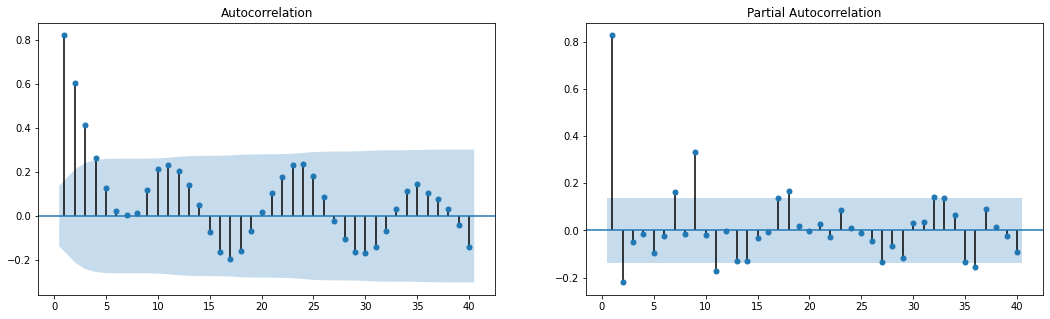

In [ ]:
import statsmodels.graphics.tsaplots as sgt

# Fixing plot size
plt.rcParams["figure.figsize"] = 18, 5

# Defining Subplots
fig, axes = plt.subplots(1, 2)

# Plotting ACF and PACF for S&P 500 Returns
sgt.plot_acf(train[pais], zero = False, lags = 40, ax = axes[0])
sgt.plot_pacf(train[pais], zero = False, lags = 40, ax = axes[1])

# Display the Plot
print(pais)
plt.show()

In [ ]:
# Check for stationarity
from statsmodels.tsa.stattools import adfuller
from numpy import log
result = adfuller(train[pais])
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -3.509971
p-value: 0.007735


## Model Fitting

In [ ]:
# MODEL FITTING
# Importing Required Package
from statsmodels.tsa.statespace.sarimax import SARIMAX

# Defining the Model
model = SARIMAX(train[pais], order = (1, 0, 3))
# Fitting the Model
model_results = model.fit()

# Printing the model summary
print(pais)
print(model_results.summary())

El Salvador
                               SARIMAX Results                                
Dep. Variable:            El Salvador   No. Observations:                  203
Model:               SARIMAX(1, 0, 3)   Log Likelihood                 191.908
Date:                Fri, 24 Sep 2021   AIC                           -373.816
Time:                        15:02:55   BIC                           -357.250
Sample:                             0   HQIC                          -367.114
                                - 203                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.9995      0.002    550.211      0.000       0.996       1.003
ma.L1          0.0368      0.059      0.623      0.534      -0.079       0.152
ma.L2         -0.2224      0.056     -3.

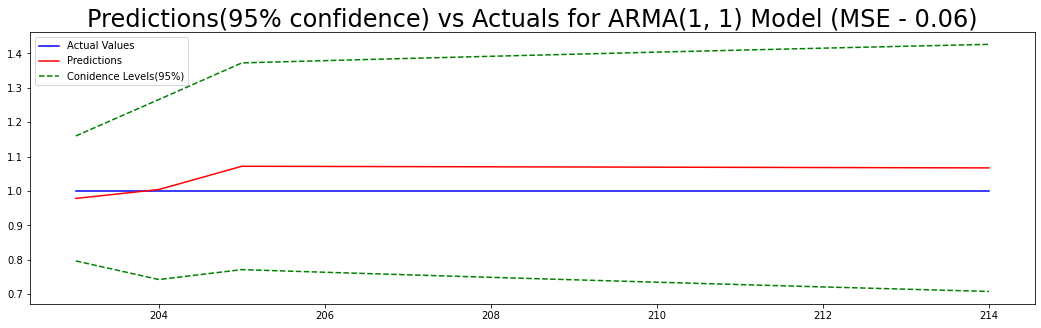

In [ ]:
# FORECASTING
# Building Forecast Object to generate Confidence Intervals
from sklearn.metrics import mean_squared_error
arma_forecast = model_results.get_forecast(len(test.index))
arma_predictions_df = arma_forecast.conf_int(alpha = 0.05) # Confidence level of 95%
# Predictions
arma_predictions_df["Predictions"] = model_results.predict(start = test.index[0], end = test.index[-1])

# RMSE for the Predictions
arma_rmse = np.sqrt(mean_squared_error(test[pais].values, arma_predictions_df["Predictions"]))


# PLOTTING FORECASTS
# Set the Size of the figure
plt.rcParams["figure.figsize"] = 18, 5

# Plot the Actuals
plt.plot(test[pais], color = "blue", label = "Actual Values")

# Plot the Forecasts and the Confidence Intervals 
plt.plot(arma_predictions_df["Predictions"][test.index], color = "red", label = "Predictions")
plt.plot(arma_predictions_df["upper "+ pais][test.index], color = "green", linestyle = "--", label = "Conidence Levels(95%)")
plt.plot(arma_predictions_df["lower "+ pais][test.index], color = "green", linestyle = "--")

# Set the Title of the Plot
plt.title(f"Predictions(95% confidence) vs Actuals for ARMA(1, 1) Model (MSE - {round(arma_rmse, 2)})", size = 24)

# Display the plot with appropriate labels
plt.legend()
plt.show()

## Model Residuals

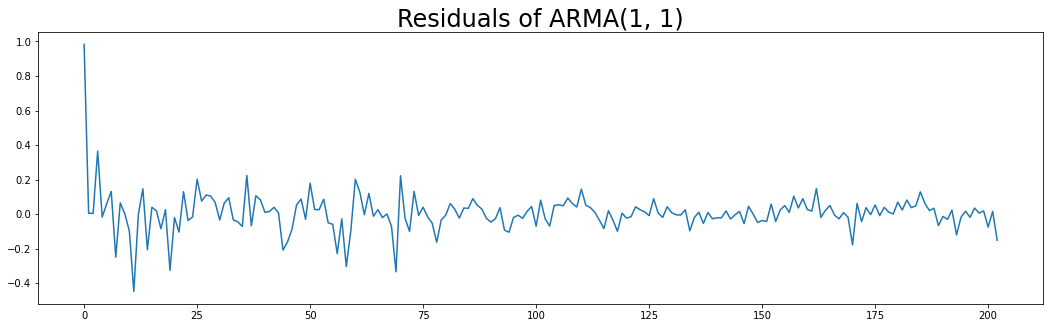

In [ ]:
# Set the figure size
plt.rcParams["figure.figsize"] = 18, 5

# Plotting residuals
plt.plot(model_results.resid, label = "Residuals")

# Setting Title
plt.title("Residuals of ARMA(1, 1)", size = 24)

# Display the plot
plt.show()

## GARCH

### Order Estimation

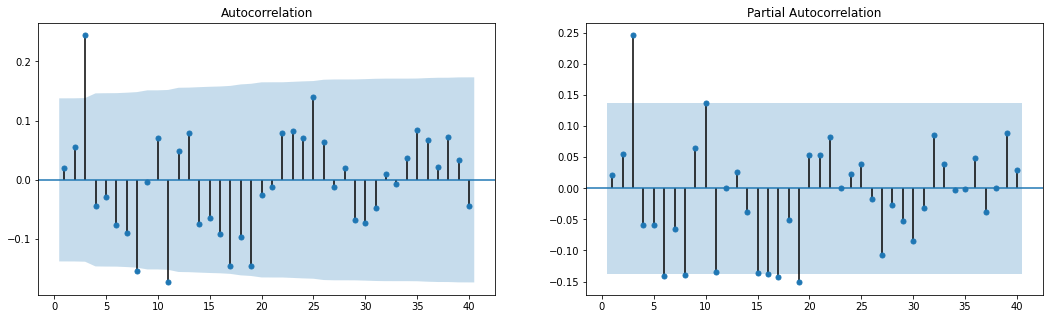

In [ ]:
residuales = model_results.resid

plt.rcParams["figure.figsize"] = 18, 5

# Defining Subplots
fig, axes = plt.subplots(1, 2)

# Plotting ACF and PACF for S&P 500 Returns
sgt.plot_acf(residuales, zero = False, lags = 40, ax = axes[0])
sgt.plot_pacf(residuales, zero = False, lags = 40, ax = axes[1])

# Display the Plot
plt.show()

GARCH 3 3 

### GACRH Estimation

In [ ]:
from arch import arch_model

# Building Residuals DataFrame
resid_df = data.copy()
resid_df[pais + "_resid"] = resid_df[pais].shift(1).loc[resid_df.index]
resid_df.at[train.index[1]:train.index[-1], pais + "_resid"] = model_results.resid

# Defining GARCH(p, q) model
resid_model = arch_model(resid_df[pais + "_resid"][1:], p = 1, q = 0, vol = "GARCH")
# Fitting (Training) the model
resid_model_results = resid_model.fit(last_obs = test.index[0], update_freq = 5)
# Displaying the model summary
resid_model_results.summary()

Iteration:      5,   Func. Count:     37,   Neg. LLF: -169.52174808559957
Iteration:     10,   Func. Count:     63,   Neg. LLF: -172.73803003969576
Optimization terminated successfully.    (Exit mode 0)
            Current function value: -172.7389148293021
            Iterations: 12
            Function evaluations: 73
            Gradient evaluations: 12


/usr/local/lib/python3.7/dist-packages/arch/univariate/base.py:310: DataScaleWarning: y is poorly scaled, which may affect convergence of the optimizer when
estimating the model parameters. The scale of y is 0.01312. Parameter
estimation work better when this value is between 1 and 1000. The recommended
rescaling is 10 * y.

This warning can be disabled by either rescaling y before initializing the
model or by setting rescale=False.

  data_scale_warning.format(orig_scale, rescale), DataScaleWarning


<class 'statsmodels.iolib.summary.Summary'>
"""
                      Constant Mean - ARCH Model Results                      
==============================================================================
Dep. Variable:      El Salvador_resid   R-squared:                       0.000
Mean Model:             Constant Mean   Adj. R-squared:                  0.000
Vol Model:                       ARCH   Log-Likelihood:                172.739
Distribution:                  Normal   AIC:                          -339.478
Method:            Maximum Likelihood   BIC:                          -329.538
                                        No. Observations:                  203
Date:                Fri, Sep 24 2021   Df Residuals:                      202
Time:                        15:04:58   Df Model:                            1
                                 Mean Model                                 
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
mu             0.0191  8.982e-03      2.124  3.371e-02 [1.469e-03,3.668e-02]
                              Volatility Model                              
============================================================================
                 coef    std err          t      P>|t|      95.0% Conf. Int.
----------------------------------------------------------------------------
omega      6.4003e-03  1.702e-03      3.761  1.690e-04 [3.065e-03,9.735e-03]
alpha[1]       1.0000      0.594      1.682  9.254e-02     [ -0.165,  2.165]
============================================================================

Covariance estimator: robust
"""

### Forecast

/usr/local/lib/python3.7/dist-packages/arch/__future__/_utility.py:21: FutureWarning: 
The default for reindex is True. After September 2021 this will change to
False. Set reindex to True or False to silence this message. Alternatively,
you can use the import comment

from arch.__future__ import reindexing

to globally set reindex to True and silence this warning.

  FutureWarning,


[]

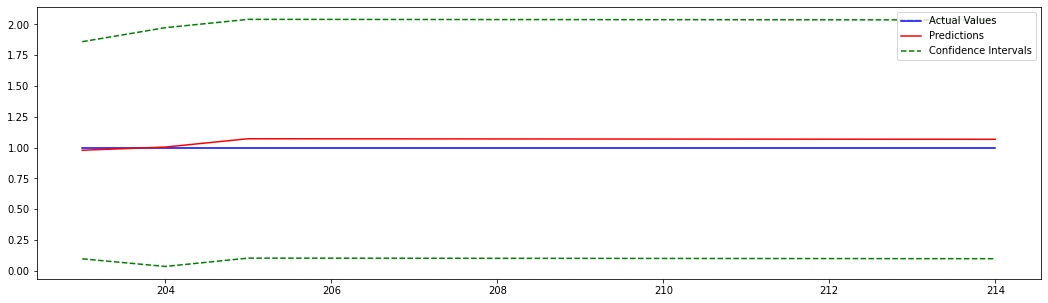

In [ ]:
# FORECASTING AND CONFIDENCE INTERVALS
# Forecasting volatility of test set
resid_forecasts = resid_model_results.forecast().residual_variance.loc[test.index].values

# New Confidence Intervals
arma_garch_predictions_df = arma_predictions_df.copy()
arma_garch_predictions_df["lower " + pais] = arma_garch_predictions_df["Predictions"] - resid_forecasts.reshape(-1,)
arma_garch_predictions_df["upper " + pais] = arma_garch_predictions_df["Predictions"] + resid_forecasts.reshape(-1,)


# PLOTTING THE FORECASTS AND CONFIDENCE INTERVALS
# Setting the Figure size
plt.rcParams["figure.figsize"] = 18, 5

# Plotting the Actual S&P 500 Returns
plt.plot(test[pais], color = "blue", label = "Actual Values")

# Plot the Forecasted Returns from ARMA(1, 1) 
plt.plot(arma_garch_predictions_df["Predictions"][test.index], color = "red", label = "Predictions")
# Plot the new confidence intervals generated by the GARCH model
plt.plot(arma_garch_predictions_df["lower " + pais][test.index], color = "green", linestyle = "--", label = "Confidence Intervals")
plt.plot(arma_garch_predictions_df["upper " + pais][test.index], color = "green", linestyle = "--")

# Display the plot and the labels
plt.legend()
plt.plot()